<a href="https://colab.research.google.com/github/jungsunyoo/xECGNet_revision/blob/main/ECG_ABN_multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import os
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt


!pip install tensorflow-gpu==1.15.5 # downgrading to match dependency of AMC
!pip install tensorflow==1.15.5
!pip install keras==2.3.1

import tensorflow as tf
import random
import keras
import datetime as dt
import time

from keras import layers
from keras import models
from tensorflow.keras import optimizers

from keras.layers import *
from keras.models import *
from keras import initializers, regularizers, constraints
from keras.layers.normalization import BatchNormalization 
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_recall_fscore_support
from tensorflow.keras import backend as K

from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/CMPB_revision/xECGNet/

from ABNmodules_multiclass import *
from sklearn.metrics import f1_score

# tf.set_random_seed(1004)
random.seed(1004)

# os.environ["CUDA_VISIBLE_DEVICES"]="1"
# config = tf.ConfigProto()
# config.gpu_options.allow_growth = True
# session = tf.Session(config=config)


     |████████████████████████████████| 411.0MB 34kB/s 
     |████████████████████████████████| 3.8MB 50.8MB/s 
     |████████████████████████████████| 20.1MB 1.3MB/s 
     |████████████████████████████████| 512kB 49.2MB/s 
     |████████████████████████████████| 51kB 8.4MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7540 sha256=a97f263fb604f09ae2c79d92c9c439b0f393256bbee606ccc24ec749b6abbb56
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.4.1 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.18.5 which is incompatible.
ERROR: tensorflow 2.4.1 has requirement tensorboard~=2.4, but you'll have tensorboard 1.15.0 which is incompatible.
ERROR: tensorflow 2.4.1 has requirement tensorflow-estimator<2.5.0,>=2.4.0, but you'll have tensorflow-estimator 1.15.1

     |████████████████████████████████| 110.5MB 49kB/s 
  Found existing installation: tensorflow 2.4.1
    Uninstalling tensorflow-2.4.1:
      Successfully uninstalled tensorflow-2.4.1
     |████████████████████████████████| 378kB 6.6MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


Using TensorFlow backend.


Mounted at /content/gdrive/
/content/gdrive/MyDrive/xECGNet_revision/xECGNet


In [ ]:
from google.colab import files
import os

# %cd /content/gdrive/MyDrive/xECGNet
# currdir= os.getcwd()
# input_directory = os.path.join('/content/gdrive/MyDrive/xECGNet', 'Training_WFDB')

# mel_name = 'Raw_data_20210423'
# mel_directory = os.path.join(input_directory, 'PhysioNetChallenge', mel_name)

dataset_file_dict = files.upload()

# for f in os.listdir(input_directory):
#     if os.path.isfile(os.path.join(input_directory, f)) and not f.lower().startswith('.') and f.lower().endswith('mat'):
#       dataset_file_dict = files.upload(f)



Saving PhysioNetChallenge2020_Training_CPSC.tar.gz to PhysioNetChallenge2020_Training_CPSC.tar.gz


In [ ]:
%ls

Mounted at /content/drive


In [ ]:
# %cd /content/gdrive/MyDrive/xECGNet
# currdir= os.getcwd()
import os
input_directory = os.path.join('/content/gdrive/MyDrive/xECGNet', 'Training_WFDB')

mel_name = 'Raw_data_20210423'
mel_directory = os.path.join(input_directory, 'PhysioNetChallenge', mel_name)


! wget -c -O *.npy https://drive.google.com/drive/u/0/folders/1J6_2_2Z3-uY4L7uxV3SOB16-wJlUB8EW 

--2021-04-25 16:23:39--  https://drive.google.com/drive/u/0/folders/1J6_2_2Z3-uY4L7uxV3SOB16-wJlUB8EW
Resolving drive.google.com (drive.google.com)... 209.85.145.100, 209.85.145.101, 209.85.145.113, ...
Connecting to drive.google.com (drive.google.com)|209.85.145.100|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://drive.google.com/drive/folders/1J6_2_2Z3-uY4L7uxV3SOB16-wJlUB8EW [following]
--2021-04-25 16:23:39--  https://drive.google.com/drive/folders/1J6_2_2Z3-uY4L7uxV3SOB16-wJlUB8EW
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://accounts.google.com/ServiceLogin?service=wise&passive=1209600&continue=https://drive.google.com/drive/folders/1J6_2_2Z3-uY4L7uxV3SOB16-wJlUB8EW&followup=https://drive.google.com/drive/folders/1J6_2_2Z3-uY4L7uxV3SOB16-wJlUB8EW [following]
--2021-04-25 16:23:39--  https://accounts.google.com/ServiceLogin?service=wise&passive=1209600&continue=https:/

In [ ]:
%pwd

'/content'

In [ ]:
!tar xvzf "/content/drive/MyDrive/xECGNet/Training_WFDB.tar" "content"


gzip: stdin: not in gzip format
tar: Child returned status 1
tar: Error is not recoverable: exiting now


In [ ]:
# %ls
# %cd Training_WFDB
# %ls
# %cd PhysioNetChallenge/
# %ls
# %cd Raw_data_20210423/
# %ls
# import os
%pwd
len(os.listdir())

4399

In [ ]:

def score_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

def dot_product(x, kernel):
    if K.backend() == 'tensorflow':
        return K.squeeze(K.dot(x, K.expand_dims(kernel)), axis=-1)
    else:
        return K.dot(x, kernel)
    
def get_unique_classes(input_directory,files):

    unique_classes=set()
    for f in files:
        g = f.replace('.mat','.hea')
        input_file = os.path.join(input_directory,g)
        with open(input_file,'r') as f:
            for lines in f:
                if lines.startswith('#Dx'):
                    tmp = lines.split(': ')[1].split(',')
                    for c in tmp:
                        unique_classes.add(c.strip())
    return sorted(unique_classes)

def one_hot_encoding(one_hot_vector,y, class2index):
    ind=class2index[y]
    one_hot_vector[ind]=1
    return one_hot_vector

# Search for multi-label subjects
def searching_overlap(input_directory,class2index, input_file_names):
    multiclasses=[]
    multisubjects=[]
    number = []
    for file in input_file_names:
        f=file
        g = f.replace('.mat','.hea')
        input_file = os.path.join(input_directory,g)
        with open(input_file,'r') as f:
            for lines in f:
                if lines.startswith('#Dx'):
                    tmp = lines.split(': ')[1].split(',')
                    if len(tmp)>1:
                        one_hot_vector = [0]*(len(class2index))
                        for c in tmp:
                            one_hot_vector = one_hot_encoding(one_hot_vector, c.strip(), class2index)
                        multiclasses.append(one_hot_vector)
                        multisubjects.append(g)
                        number.append(len(tmp))
    return multisubjects, multiclasses, number

def block_feature(sequence_en, minimum_len): 
    new_en = []
    if len(sequence_en) > minimum_len:  # 길이가 minimum보다 긴 경우
        start = random.randint(0,len(sequence_en)-minimum_len)
        #print(start)
        new_en = sequence_en[start:start+minimum_len]
    elif len(sequence_en) == minimum_len: # 길이가 minimum
        new_en = sequence_en
    else: 
        assert len(sequence_en) <= minimum_len
    return new_en

def exploratory_look(input_directory,file, class2index):
    classes = []
    f = file
    g = f.replace('.mat','.hea')
    input_file = os.path.join(input_directory,g)
    with open(input_file,'r') as f:
        for lines in f:
            if lines.startswith('#Dx'):
                tmp = lines.split(': ')[1].split(',')
                print(tmp, len(tmp))
    return tmp     

# Get classes of sorted file names
def get_labels(input_directory,file, class2index):
    f = file
    g = f.replace('.mat','.hea')
    input_file = os.path.join(input_directory,g)
    with open(input_file,'r') as f:
        for lines in f:
            if lines.startswith('#Dx'):
                tmp = lines.split(': ')[1].split(',')
                one_hot_vector = [0]*(len(class2index))
                for c in tmp:
                    one_hot_vector = one_hot_encoding(one_hot_vector, c.strip(), class2index)
                
    return one_hot_vector

def randextract_mels(curr_step, batch_size, data, mel_directory, class2index, minimum_len, x_mean_final, x_std_final):
    mel_files = []
    classes = []
    start = batch_size*curr_step
    end = batch_size*(curr_step+1)
    curr_file_indices = data[start:end]
    for file in curr_file_indices:
        tmp_file = np.load(mel_directory + '/' + file.replace('.mat', '.npy'))
        clip_file = block_feature(tmp_file, minimum_len)
        clip_file -= x_mean_final
        clip_file /= x_std_final
        mel_files.append(clip_file)
        label = get_labels(input_directory, file, class2index)
        classes.append(label)
    
    concat = list(zip(mel_files, classes))
    random.shuffle(concat)
    mel_files, classes = zip(*concat)
    return mel_files, classes

def zeropadding_mels(curr_step, batch_size, data, mel_directory, class2index, minimum_len, x_mean_final, x_std_final):
    mel_files = []
    classes = []
    start = batch_size*curr_step
    end = batch_size*(curr_step+1)
    curr_file_indices = data[start:end]    
    for file in curr_file_indices:
        
        tmp_file = np.load(mel_directory + '/' + file.replace('.mat', '.npy'))
        tmp_file -= x_mean_final
        tmp_file /= x_std_final        
#         print(tmp_file.shape)
        zero_padding = np.zeros((minimum_len-len(tmp_file), 12))
#         print(zero_padding.shape)
        clip_file = np.concatenate((zero_padding, tmp_file), axis=0)
#         print(clip_file)
#         clip_file = zero_padding + tmp_file
#         print(clip_file.shape)
#         clip_file = block_feature(tmp_file, minimum_len)
        #print(clip_file.shape)
        #clip_file = tmp_file[:minimum_len]

        mel_files.append(clip_file)
        label = get_labels(input_directory, file, class2index)
        classes.append(label)
    concat = list(zip(mel_files, classes))
    random.shuffle(concat)
    mel_files, classes = zip(*concat)
    return mel_files, classes  

def train(data_train, mel_directory, batch_size, class2index, minimum_len, x_mean_final, x_std_final, model): 
    loss=[]
#     acc = []
    f1 = []

    total_steps = int(np.ceil(len(data_train)/batch_size))
    for curr_step in range(total_steps): # loops over batches
        batch_mels, batch_labels = randextract_mels(curr_step, batch_size, data_train, mel_directory, class2index, minimum_len, x_mean_final, x_std_final)
#         batch_mels, batch_labels = zeropadding_mels(curr_step, batch_size, data_train, mel_directory, class2index, minimum_len, x_mean_final, x_std_final)
        batch_mels = np.asarray(batch_mels)
        batch_labels = np.asarray(np.squeeze(batch_labels))
        
        batch_labels = [batch_labels, batch_labels]


# return of train
# 0 = total loss (attention branch + perception branch)
# 1 = loss of attention pred
# 2 = loss of perception pred
# 3 = f1 of attention pred
# 4 = f1 of perception pred     


        train_tmp = model.train_on_batch(batch_mels, batch_labels)
        loss_ = train_tmp[0]/2
        f1_ = np.mean((train_tmp[3], train_tmp[4]))
        loss.append(loss_)
        f1.append(f1_)

    loss = np.mean(np.array(loss))
    f1 = np.mean(np.array(f1))
    return loss, f1

def train_edit(data_train, mel_directory, batch_size, class2index, minimum_len, x_mean_final, x_std_final, model): 
    loss=[]
#     acc = []
    f1 = []

    total_steps = int(np.ceil(len(data_train)/batch_size))
    for curr_step in range(total_steps): # loops over batches
        batch_mels, batch_labels = randextract_mels(curr_step, batch_size, data_train, mel_directory, class2index, minimum_len, x_mean_final, x_std_final)

        batch_mels = np.asarray(batch_mels)
        batch_labels = np.asarray(np.squeeze(batch_labels))


        heatmap = CAM_conv1D(minimum_len, n_channels, batch_mels, batch_labels, out_len, get_conv_out)        
        heatmap = np.asarray(heatmap)
        
        batch_labels = [batch_labels, batch_labels]


# return of train
# 0 = total loss (attention branch + perception branch)
# 1 = loss of attention pred
# 2 = loss of perception pred
# 3 = f1 of attention pred
# 4 = f1 of perception pred     

        train_tmp = model.train_on_batch([batch_mels, heatmap], batch_labels)
        loss_ = train_tmp[0]/2
        f1_ = np.mean((train_tmp[3], train_tmp[4]))
        loss.append(loss_)
        f1.append(f1_)

    loss = np.mean(np.array(loss))
    f1 = np.mean(np.array(f1))
    return loss, f1

def test(data, mel_directory, input_directory, class2index, minimum_len, model, x_mean_final, x_std_final):
    scores = []
    predicted_labels=[]
    accuracy=np.zeros(len(data))
    total_acc = 0
    total_f1 = 0
    
    y_true = []
    y_pred=[]
    
    mel_files = []
    classes = []
    
    multi_files, _, _ = searching_overlap(input_directory,class2index, data)
    multi_acc = 0
    multi_y_true=[]
    multi_y_pred=[]    
    single_acc = 0
    single_y_true=[]
    single_y_pred=[]     
    
    for file in data:
        tmp_file = np.load(mel_directory + '/' + file.replace('.mat', '.npy'))
        steps = int(np.floor(tmp_file.shape[0]/minimum_len))
        mel_files = []
        heatmap_files=[]
        label = get_labels(input_directory, file, class2index)
        label = [label]
        for block in range(steps): # 128개씩 쪼갠 블럭 단위로 predict
            start = block*minimum_len
            end = (block+1)*minimum_len
            clip_file = tmp_file[start:end]
            clip_file -= x_mean_final
            clip_file /= x_std_final
            clip_file = clip_file.reshape(1,minimum_len,n_channels)
            mel_files.append(clip_file)    
        mel_files = np.asarray(mel_files)
        mel_files = mel_files.reshape(steps,minimum_len,n_channels)
        logit = model.predict(mel_files)
        logit = np.mean(logit, axis=0)
        logit = np.mean(logit, axis=0)
        pred = np.zeros(len(logit))
        for ii, label in enumerate(logit):
            if label >= 0.5:
                pred[ii] = 1
            else:
                pred[ii] = 0
        pred = pred.tolist()
        y_pred.append(pred)
        label = get_labels(input_directory,file,class2index)
        y_true.append(label)
        if pred == label:
            acc = 1
        else:
            acc = 0
        total_acc += acc
        if file.replace('.mat', '.hea') in multi_files:
            multi_y_true.append(label)            
            multi_y_pred.append(pred)
            multi_acc += acc
        else: # for calculating single_label accuracy
            single_y_true.append(label)            
            single_y_pred.append(pred)
            single_acc += acc            
        
    final_acc = total_acc / len(data)
    f1_classes = f1_score(y_true, y_pred, average=None)
    f1_micro = f1_score(y_true, y_pred, average='micro')
    
    multi_final_acc = multi_acc / len(multi_files)
    multi_f1_classes = f1_score(multi_y_true, multi_y_pred, average=None)
    multi_f1_micro = f1_score(multi_y_true, multi_y_pred, average='micro')

    single_final_acc = single_acc / (len (data) - len(multi_files))
    single_f1_classes = f1_score(single_y_true, single_y_pred, average=None)
    single_f1_micro = f1_score(single_y_true, single_y_pred, average='micro')    
    
    return final_acc, f1_classes, f1_micro, multi_final_acc, multi_f1_classes, multi_f1_micro, single_final_acc, single_f1_classes, single_f1_micro

def test_zero(data, mel_directory, input_directory, class2index, minimum_len, model, x_mean_final, x_std_final):
    scores = []
    predicted_labels=[]
    accuracy=np.zeros(len(data))
    #total_loss=[]
    total_acc = 0
    total_f1 = 0
    y_true = []
    y_pred=[]    
    mel_files = []
    classes = []
    
    
    multi_files, _, _ = searching_overlap(input_directory,class2index, data)
    multi_acc = 0
    multi_y_true=[]
    multi_y_pred=[]    
    single_acc = 0
    single_y_true=[]
    single_y_pred=[]  
    for file in data:
        tmp_file = np.load(mel_directory + '/' + file.replace('.mat', '.npy'))
        tmp_file -= x_mean_final
        tmp_file /= x_std_final
        steps = int(np.floor(tmp_file.shape[0]/minimum_len))
        mel_files = []
#         for block in range(steps): # 128개씩 쪼갠 블럭 단위로 predict
            
        zero_padding = np.zeros((minimum_len-len(tmp_file), 12))
        clip_file = np.concatenate((zero_padding, tmp_file), axis=0)
#         print(clip_file.shape)
        

        mel_files.append(clip_file)
        mel_files = np.asarray(mel_files)
        logit = model.predict(mel_files)
        logit = np.mean(logit, axis=0)
        logit = np.mean(logit, axis=0)        
        
        
        pred = np.zeros(len(logit))
        for ii, label in enumerate(logit):
            if label >= 0.5:
                pred[ii] = 1
            else:
                pred[ii] = 0
        pred = pred.tolist()
        y_pred.append(pred)        
        label = get_labels(input_directory,file,class2index)
        y_true.append(label)
        
        if pred == label:
            acc = 1
        else:
            acc = 0
        total_acc += acc
        if file.replace('.mat', '.hea') in multi_files:
            multi_y_true.append(label)            
            multi_y_pred.append(pred)
            multi_acc += acc         
        else: # for calculating single_label accuracy
            single_y_true.append(label)            
            single_y_pred.append(pred)
            single_acc += acc         
        #total_f1 += f1
    final_acc = total_acc / len(data)
    f1_classes = f1_score(y_true, y_pred, average=None)
    f1_micro = f1_score(y_true, y_pred, average='micro')
    
    multi_final_acc = multi_acc / len(multi_files)
    multi_f1_classes = f1_score(multi_y_true, multi_y_pred, average=None)
    multi_f1_micro = f1_score(multi_y_true, multi_y_pred, average='micro')
    
    single_final_acc = single_acc / (len (data) - len(multi_files))
    single_f1_classes = f1_score(single_y_true, single_y_pred, average=None)
    single_f1_micro = f1_score(single_y_true, single_y_pred, average='micro')    
    
    return final_acc, f1_classes, f1_micro, multi_final_acc, multi_f1_classes, multi_f1_micro, single_final_acc, single_f1_classes, single_f1_micro


def test_edit(data, mel_directory, input_directory, class2index, minimum_len, model, x_mean_final, x_std_final):
    scores = []
    predicted_labels=[]
    accuracy=np.zeros(len(data))
    #total_loss=[]
    total_acc = 0
    total_f1 = 0
    
    y_true = []
    y_pred = []
    
    mel_files = []
    classes = []
    
    multi_files, _, _ = searching_overlap(input_directory,class2index, data)
    multi_acc = 0
    multi_y_true=[]
    multi_y_pred=[]    
    
    for file in data:
        tmp_file = np.load(mel_directory + '/' + file.replace('.mat', '.npy'))
        steps = int(np.floor(tmp_file.shape[0]/minimum_len))
        mel_files = []
        heatmap_files=[]
        label = get_labels(input_directory, file, class2index)
        label = [label]
        for block in range(steps): # 128개씩 쪼갠 블럭 단위로 predict
            start = block*minimum_len
            end = (block+1)*minimum_len
            clip_file = tmp_file[start:end]
            clip_file -= x_mean_final
            clip_file /= x_std_final
            clip_file = clip_file.reshape(1,minimum_len,n_channels)
            heatmap = CAM_conv1D(minimum_len, n_channels, clip_file, label, out_len, get_conv_out)
            mel_files.append(clip_file)    
            heatmap_files.append(heatmap)
        mel_files = np.asarray(mel_files)
        heatmap_files = np.asarray(heatmap_files)
        heatmap_files = heatmap_files.reshape(steps, out_len,1)
        mel_files = mel_files.reshape(steps,minimum_len,n_channels)
        logit = model.predict([mel_files, heatmap_files])
        logit = np.mean(logit, axis=0)
        logit = np.mean(logit, axis=0)
        pred = np.zeros(len(logit))
        for ii, label in enumerate(logit):
            if label >= 0.5:
                pred[ii] = 1
            else:
                pred[ii] = 0
        pred = pred.tolist()
        y_pred.append(pred)
        label = get_labels(input_directory,file,class2index)
        y_true.append(label)
        if pred == label:
            acc = 1
        else:
            acc = 0
        total_acc += acc
        if file.replace('.mat', '.hea') in multi_files:
            multi_y_true.append(label)
            multi_y_pred.append(pred)
            multi_acc += acc               
    final_acc = total_acc / len(data)
    f1_classes = f1_score(y_true, y_pred, average=None)
    f1_micro = f1_score(y_true, y_pred, average='micro')
    
    multi_final_acc = multi_acc / len(multi_files)
    multi_f1_classes = f1_score(multi_y_true, multi_y_pred, average=None)
    multi_f1_micro = f1_score(multi_y_true, multi_y_pred, average='micro')
    
    return final_acc, f1_classes, f1_micro, multi_final_acc, multi_f1_classes, multi_f1_micro

def test_edit_final(data, mel_directory, input_directory, class2index, minimum_len, model, x_mean_final, x_std_final, p_model):
    scores = []
    predicted_labels=[]
    accuracy=np.zeros(len(data))
    #total_loss=[]
    total_acc = 0
    total_f1 = 0
    
    y_true = []
    y_pred=[]
    
    
    mel_files = []
    classes = []
    
    multi_files, _, _ = searching_overlap(input_directory,class2index, data)
    multi_acc = 0
    multi_y_true=[]
    multi_y_pred=[]
    
    for file in data:
        tmp_file = np.load(mel_directory + '/' + file.replace('.mat', '.npy'))
        steps = int(np.floor(tmp_file.shape[0]/minimum_len))
        mel_files = []
        mel_files_logit = []
        heatmap_files=[]

        for block in range(steps): # 128개씩 쪼갠 블럭 단위로 predict
            start = block*minimum_len
            end = (block+1)*minimum_len
            clip_file = tmp_file[start:end]
            clip_file -= x_mean_final
            clip_file /= x_std_final
            clip_file = clip_file.reshape(1,minimum_len,n_channels)
            
            # 여기서 logit으로 y구함#####################
            logit_ = p_model.predict(clip_file)
            logit_ = np.mean(logit_, axis=0)
            logit_ = np.mean(logit_, axis=0)
            pred_ = np.zeros(len(logit_))
            for ii, label in enumerate(logit_):
                if label >= 0.5: 
                    pred_[ii] = 1
                else:
                    pred_[ii] = 0
            pred_ = pred_.tolist()
            ##########################################
            
            heatmap = CAM_conv1D(minimum_len, n_channels, clip_file, [pred_], out_len, get_conv_out)
            mel_files.append(clip_file)    
            heatmap_files.append(heatmap)
        mel_files = np.asarray(mel_files)
        heatmap_files = np.asarray(heatmap_files)
        heatmap_files = heatmap_files.reshape(steps, out_len,1)
        mel_files = mel_files.reshape(steps,minimum_len,n_channels)
        logit = model.predict([mel_files, heatmap_files])
        logit = np.mean(logit, axis=0)
        logit = np.mean(logit, axis=0)
        pred = np.zeros(len(logit))
        for ii, label in enumerate(logit):
            if label >= 0.5:
                pred[ii] = 1
            else:
                pred[ii] = 0
        pred = pred.tolist()
        y_pred.append(pred)
        label = get_labels(input_directory,file,class2index)
        y_true.append(label)
        if pred == label:
            acc = 1
        else:
            acc = 0
        total_acc += acc
        if file.replace('.mat', '.hea') in multi_files:
            multi_y_true.append(label)          
            multi_y_pred.append(pred)
            multi_acc += acc       

    final_acc = total_acc / len(data)
    f1_classes = f1_score(y_true, y_pred, average=None)
    f1_micro = f1_score(y_true, y_pred, average='micro')
    
    multi_final_acc = multi_acc / len(multi_files)
    multi_f1_classes = f1_score(multi_y_true, multi_y_pred, average=None)
    multi_f1_micro = f1_score(multi_y_true, multi_y_pred, average='micro')
    
    return final_acc, f1_classes, f1_micro, multi_final_acc, multi_f1_classes, multi_f1_micro

def test_edit_final2(data, mel_directory, input_directory, class2index, minimum_len, model, x_mean_final, x_std_final, p_model):
    scores = []
    predicted_labels=[]
    accuracy=np.zeros(len(data))
    #total_loss=[]
    total_acc = 0
    total_f1 = 0
    
    mel_files = []
    classes = []
    
    y_true = []
    y_pred=[]    

    multi_files, _, _ = searching_overlap(input_directory,class2index, data)
    multi_acc = 0
    multi_y_true=[]
    multi_y_pred=[]    
    
    for file in data:
        tmp_file = np.load(mel_directory + '/' + file.replace('.mat', '.npy'))
        steps = int(np.floor(tmp_file.shape[0]/minimum_len))
        mel_files = []
        mel_files_logit = []
        heatmap_files=[]

        for block in range(steps):
            # 여기서 logit으로 y구함
            start = block*minimum_len
            end = (block+1)*minimum_len
            clip_file = tmp_file[start:end]
            clip_file -= x_mean_final
            clip_file /= x_std_final
            clip_file = clip_file.reshape(1,minimum_len,n_channels)
            mel_files_logit.append(clip_file)
            
        mel_files_logit = np.asarray(mel_files_logit)
        mel_files_logit = mel_files_logit.reshape(steps,minimum_len,n_channels)
        
        
        
        logit_ = p_model.predict(mel_files_logit)
        
        logit_ = np.mean(logit_, axis=0)
        logit_ = np.mean(logit_, axis=0)
#         print(logit_)
        pred_ = np.zeros(len(logit_))
        for ii, label in enumerate(logit_):
            if label >= 0.5: 
                pred_[ii] = 1
            else:
                pred_[ii] = 0
        
        pred_ = pred_.tolist()

#         print(pred_)
            #######
        
        
        for block in range(steps): # 128개씩 쪼갠 블럭 단위로 predict
            start = block*minimum_len
            end = (block+1)*minimum_len
            clip_file = tmp_file[start:end]
            clip_file -= x_mean_final
            clip_file /= x_std_final
            clip_file = clip_file.reshape(1,minimum_len,n_channels)

            heatmap = CAM_conv1D(minimum_len, n_channels, clip_file, [pred_], out_len, get_conv_out)
#             print(heatmap)
            mel_files.append(clip_file)    
            heatmap_files.append(heatmap)
        mel_files = np.asarray(mel_files)
        heatmap_files = np.asarray(heatmap_files)
        heatmap_files = heatmap_files.reshape(steps, out_len,1)
        mel_files = mel_files.reshape(steps,minimum_len,n_channels)
        logit = model.predict([mel_files, heatmap_files])
        logit = np.mean(logit, axis=0)
        logit = np.mean(logit, axis=0)
        pred = np.zeros(len(logit))
       

        for ii, label in enumerate(logit):
            if label >= 0.5:
                pred[ii] = 1
            else:
                pred[ii] = 0
        pred = pred.tolist()
        y_pred.append(pred)
#         print(pred)
        label = get_labels(input_directory,file,class2index)
        y_true.append(label)
#         print(label)
        if pred == label:
            acc = 1
        else:
            acc = 0
        total_acc += acc
        if file.replace('.mat', '.hea') in multi_files:
            multi_y_true.append(label)
            multi_y_pred.append(pred)
            multi_acc += acc       

    final_acc = total_acc / len(data)
    f1_classes = f1_score(y_true, y_pred, average=None)
    f1_micro = f1_score(y_true, y_pred, average='micro')
    
    multi_final_acc = multi_acc / len(multi_files)
    multi_f1_classes = f1_score(multi_y_true, multi_y_pred, average=None)
    multi_f1_micro = f1_score(multi_y_true, multi_y_pred, average='micro')
    
    return final_acc, f1_classes, f1_micro, multi_final_acc, multi_f1_classes, multi_f1_micro



In [ ]:
# def get_unique_classes(input_directory,files):

#     unique_classes=set()
#     for f in files:
#         g = f.replace('.mat','.hea')
#         input_file = os.path.join(input_directory,g)
#         with open(input_file,'r') as f:
#             for lines in f:
#                 if lines.startswith('#Dx'):
#                     tmp = lines.split(': ')[1].split(',')
#                     for c in tmp:
#                         unique_classes.add(c.strip())
#     return sorted(unique_classes)
# unique_classes = get_unique_classes(input_directory, input_files)

unique_classes=set()
files = input_files[:1000]
for f in files:
  g = f.replace('.mat','.hea')
  g
  input_file = os.path.join(input_directory,g)
  with open(input_file,'r') as f:
  # input_file
  # with open(input_file,'r') as f:
      for lines in f:
        # print(lines)
        if lines.startswith('#Dx'):
            tmp = lines.split(': ')[1].split(',')
            for c in tmp:
                unique_classes.add(c.strip())

unique_classes

{'AF', 'I-AVB', 'LBBB', 'Normal', 'PAC', 'PVC', 'RBBB', 'STD', 'STE'}

In [ ]:
files

'A4597.mat'

In [ ]:
batch_size = 32
minimum_len = 2880 #72000 #2880
epochs = 1000#300#1000
n_channels=12
loss_function = 'binary_crossentropy' 
rootdir = '../'
date = dt.datetime.today().strftime("%Y%m%d")


%cd /content/gdrive/MyDrive/xECGNet
currdir= os.getcwd()
input_directory = os.path.join(currdir, 'Training_WFDB')


# input_directory = os.path.join(rootdir, 'Training_WFDB')
# mel_name = 'Raw_data_20200424' 
mel_name = 'Raw_data_20210423'
# %cd /content/gdrive/MyDrive/xECGNet/PhysioNetChallenge/Raw_data_20210423/
# mel_directory =  os.getcwd()
mel_directory = os.path.join(input_directory, 'PhysioNetChallenge', mel_name)

# results_directory = os.path.join(rootdir, 'results_'+date+'_0_IEEE_n=1')
# results_directory = os.path.join(rootdir, 'results_'+date+'_editting_CAM_multiclass')

if not os.path.isdir(input_directory):
    os.mkdir(input_directory)
if not os.path.isdir(mel_directory):
    os.mkdir(mel_directory)

        
input_files = []
for f in os.listdir(input_directory):
    if os.path.isfile(os.path.join(input_directory, f)) and not f.lower().startswith('.') and f.lower().endswith('mat'):
        input_files.append(f)
input_file_names = sorted(input_files)

unique_classes = get_unique_classes(input_directory, input_files[:1000])
class2index = {}
for a, b in enumerate(unique_classes):
    class2index[b] = a

np.shape(input_file_names)

# x_mean_all = []
# x_std_all = []
# for file in input_file_names:
#     x = np.load(mel_directory + '/' + file.replace('.mat', '.npy'))
#     x_mean = [np.mean(x[:,0]), np.mean(x[:,1]), np.mean(x[:,2]), np.mean(x[:,3]), np.mean(x[:,4]), np.mean(x[:,5]),
#              np.mean(x[:,6]), np.mean(x[:,7]), np.mean(x[:,8]), np.mean(x[:,9]), np.mean(x[:,10]), np.mean(x[:,11])]
    
#     x_std = [np.std(x[:,0]), np.std(x[:,1]), np.std(x[:,2]), np.std(x[:,3]), np.std(x[:,4]), np.std(x[:,5]),
#              np.std(x[:,6]), np.std(x[:,7]), np.std(x[:,8]), np.std(x[:,9]), np.std(x[:,10]), np.std(x[:,11])]
#     x_mean_all.append(x_mean)
#     x_std_all.append(x_std) # yjs corrected on 2020-05-25
# x_mean_final = np.mean(x_mean_all, axis=0)
# x_std_final = np.mean(x_std_all, axis=0)
x_mean_final = [-0.0012702,   0.00038759,  0.00402317, -0.0029567,   0.00051957,  0.00116427,
                -0.0008405,  -0.00222516, -0.0019119,  -0.00093502,  0.00129789,  0.00177598] 
x_std_final = [121.2456166,  149.50174696, 121.3841284,  124.19286346,  96.9889747, 121.02868866, 
               204.28935094, 293.52025942, 299.99530255, 308.87810818, 290.92960855, 260.29808275]

data, data_test = train_test_split(input_file_names, test_size = 0.2, train_size = 0.8, shuffle=True, random_state=1004)
data_train, data_val = train_test_split(data, test_size = 0.05, train_size = 0.95, shuffle=True, random_state=1004)
print(np.shape(data_train), np.shape(data_val), np.shape(data_test))

main_input = Input(shape=(minimum_len,12), dtype='float32', name='main_input')

/content/gdrive/MyDrive/xECGNet
(5225,) (276,) (1376,)


In [ ]:
print(x_mean_final, x_std_final)

[-0.0012702, 0.00038759, 0.00402317, -0.0029567, 0.00051957, 0.00116427, -0.0008405, -0.00222516, -0.0019119, -0.00093502, 0.00129789, 0.00177598] [121.2456166, 149.50174696, 121.3841284, 124.19286346, 96.9889747, 121.02868866, 204.28935094, 293.52025942, 299.99530255, 308.87810818, 290.92960855, 260.29808275]


In [ ]:
data_train # starts with A2355

['A2355.mat',
 'A3446.mat',
 'A1814.mat',
 'A3575.mat',
 'A6197.mat',
 'A6727.mat',
 'A3974.mat',
 'A3380.mat',
 'A1978.mat',
 'A2265.mat',
 'A3514.mat',
 'A4147.mat',
 'A3852.mat',
 'A0245.mat',
 'A1846.mat',
 'A5979.mat',
 'A1696.mat',
 'A3454.mat',
 'A5164.mat',
 'A6827.mat',
 'A6778.mat',
 'A5403.mat',
 'A5567.mat',
 'A5923.mat',
 'A0254.mat',
 'A4950.mat',
 'A3926.mat',
 'A4083.mat',
 'A0223.mat',
 'A6569.mat',
 'A5393.mat',
 'A6343.mat',
 'A0300.mat',
 'A3324.mat',
 'A5812.mat',
 'A6865.mat',
 'A6600.mat',
 'A6153.mat',
 'A5947.mat',
 'A0999.mat',
 'A0613.mat',
 'A5423.mat',
 'A5316.mat',
 'A2158.mat',
 'A3799.mat',
 'A0598.mat',
 'A2677.mat',
 'A5973.mat',
 'A2911.mat',
 'A5053.mat',
 'A1400.mat',
 'A1283.mat',
 'A3298.mat',
 'A2962.mat',
 'A3459.mat',
 'A5462.mat',
 'A5589.mat',
 'A1946.mat',
 'A3583.mat',
 'A3842.mat',
 'A5419.mat',
 'A1267.mat',
 'A2669.mat',
 'A6353.mat',
 'A4129.mat',
 'A1017.mat',
 'A6503.mat',
 'A2249.mat',
 'A0345.mat',
 'A0445.mat',
 'A6595.mat',
 'A329

In [ ]:
data_val # starts with A5949

['A5949.mat',
 'A0268.mat',
 'A0938.mat',
 'A0379.mat',
 'A6235.mat',
 'A5085.mat',
 'A0368.mat',
 'A4547.mat',
 'A6477.mat',
 'A3075.mat',
 'A1011.mat',
 'A0821.mat',
 'A6566.mat',
 'A0688.mat',
 'A3682.mat',
 'A5270.mat',
 'A6875.mat',
 'A0698.mat',
 'A1369.mat',
 'A1633.mat',
 'A3438.mat',
 'A6648.mat',
 'A0988.mat',
 'A2271.mat',
 'A4479.mat',
 'A0499.mat',
 'A5788.mat',
 'A5377.mat',
 'A4074.mat',
 'A3279.mat',
 'A0944.mat',
 'A1244.mat',
 'A4372.mat',
 'A3159.mat',
 'A5350.mat',
 'A1703.mat',
 'A5599.mat',
 'A5319.mat',
 'A3609.mat',
 'A0018.mat',
 'A4472.mat',
 'A0262.mat',
 'A3497.mat',
 'A4132.mat',
 'A2589.mat',
 'A0033.mat',
 'A6427.mat',
 'A3516.mat',
 'A3639.mat',
 'A5699.mat',
 'A6117.mat',
 'A2881.mat',
 'A1386.mat',
 'A0592.mat',
 'A5711.mat',
 'A4696.mat',
 'A3192.mat',
 'A2427.mat',
 'A5336.mat',
 'A1233.mat',
 'A3805.mat',
 'A1748.mat',
 'A0407.mat',
 'A4002.mat',
 'A1318.mat',
 'A3105.mat',
 'A3764.mat',
 'A4894.mat',
 'A5889.mat',
 'A0225.mat',
 'A3407.mat',
 'A234

In [ ]:
data_test # starts with A0349

['A0349.mat',
 'A3947.mat',
 'A3900.mat',
 'A0817.mat',
 'A2140.mat',
 'A6793.mat',
 'A1879.mat',
 'A0900.mat',
 'A0454.mat',
 'A6855.mat',
 'A1142.mat',
 'A2316.mat',
 'A1701.mat',
 'A0892.mat',
 'A4156.mat',
 'A6654.mat',
 'A1902.mat',
 'A3887.mat',
 'A4328.mat',
 'A6705.mat',
 'A2393.mat',
 'A1654.mat',
 'A4534.mat',
 'A4223.mat',
 'A6232.mat',
 'A5215.mat',
 'A6361.mat',
 'A2060.mat',
 'A5460.mat',
 'A4804.mat',
 'A5066.mat',
 'A6283.mat',
 'A3889.mat',
 'A0621.mat',
 'A5856.mat',
 'A0943.mat',
 'A1936.mat',
 'A3808.mat',
 'A5473.mat',
 'A6224.mat',
 'A6848.mat',
 'A1420.mat',
 'A3335.mat',
 'A3258.mat',
 'A1623.mat',
 'A4062.mat',
 'A5721.mat',
 'A5733.mat',
 'A1238.mat',
 'A4654.mat',
 'A4504.mat',
 'A0987.mat',
 'A2839.mat',
 'A4243.mat',
 'A5778.mat',
 'A6173.mat',
 'A1782.mat',
 'A5404.mat',
 'A1443.mat',
 'A3470.mat',
 'A6876.mat',
 'A1230.mat',
 'A1870.mat',
 'A1186.mat',
 'A0736.mat',
 'A4685.mat',
 'A4562.mat',
 'A4444.mat',
 'A1568.mat',
 'A3403.mat',
 'A6465.mat',
 'A039

### Checking how many multilabel in each dataset

In [ ]:
# multi_train, _, _ = searching_overlap(input_directory, class2index, data_train)
# multi_val, _, _ = searching_overlap(input_directory, class2index, data_val)
# multi_test, _, _ = searching_overlap(input_directory, class2index, data_test)
# print(len(multi_train))
# print(len(multi_val))
# print(len(multi_test))

### For attention editting using CAM extracted from primitive ABN

In [ ]:
# # CAMdir = '/home/taejoon/PhysioNetChallenge/results_20200622_ABN_multiclass_V4_primitiveABN'
# CAMdir = '/home/taejoon/PhysioNetChallenge/results_20200625_V4_ABN_primitive_n=1'
# p_model = primitive_ABN((None, 12), 9, minimum_len, out_ch=256, n=1)
# latest = tf.train.latest_checkpoint(CAMdir)
# p_model.load_weights(latest)

# conv_layer = 'activation_5'
# softmax_layer = 'perception_branch_dense_2'


# out_len=12
# get_conv_out = K.function(p_model.input, [p_model.get_layer(conv_layer).output, p_model.get_layer(softmax_layer).weights[0]])

# def CAM_conv1D(minimum_len, n_channels, x, y, out_len, get_conv_out):
    
#     # x랑 y는 batch size만큼의 리스트 (32)
#     heatmaps=[]    
    
#     curr_x = np.asarray(x)
#     curr_x = curr_x.reshape(len(x),minimum_len,n_channels)
    
#     conv_out, softmax_weights = get_conv_out(curr_x)

#     for i in range(len(x)):

#         curr_classes = y[i]
#         class_index=[]
#         [class_index.append(j) for j in range(len(curr_classes)) if curr_classes[j]==1]
#         heatmap = np.zeros((1,12)) #heatmap=np.zeros((1,36)) # might need to fix this if GradCAM or primitive model changes

#         conv_out_ = conv_out[i] # (36, 128) / (32, 12, 256)
# #         print(conv_out.shape)

#         for label in class_index:  # multiclass일 경우 대비해서 for문
#             curr_weights = softmax_weights[:,label]
#             weighted_conv = conv_out_*curr_weights
            
#             weighted_conv = weighted_conv.sum(axis=-1) # output = (1,36)
#             heatmap += weighted_conv
            
#         heatmap %= len(class_index) # 단일 class일 경우 1로 나눠짐. 두개일 경우 더해진 heatmap들이 2로 나눠짐
# #         heatmap = np.resize(heatmap, (1,out_len))
#         heatmap = np.resize(heatmap, (out_len, 1))
#         heatmaps.append(heatmap)
        
#     return heatmaps
# p_model.summary()

In [ ]:
# results_directory = os.path.join(rootdir, 'results_'+date+'_V5_ABN_primitive_leakyRELU_dropout_ver4')

# gamma = 0.0001 # 0.001


# model = ABN_model((None,12), len(unique_classes), minimum_len, n=1)
# model = primitive_ABN((None,12), len(unique_classes), minimum_len, n=1)
# model = edit_ABN_model((None,12), len(unique_classes), minimum_len,n=1)
# model, edit_loss = edit_ABN_model_loss((None,12), len(unique_classes), minimum_len,n=1, gamma = gamma)



# model.compile(loss=edit_loss,
#               optimizer=optimizers.Adam(lr=1e-5),           
#               metrics=[score_f1])


In [ ]:
# # 중단된 training 이어돌리기위해 임시로 사용
# results_directory = results_directory.replace("0608", "0604") # 날짜 달라졌을때
# latest = tf.train.latest_checkpoint(results_directory)
# latest
# model.load_weights(latest)

In [ ]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         148G   39G  109G  27% /
tmpfs            64M     0   64M   0% /dev
tmpfs            13G     0   13G   0% /sys/fs/cgroup
shm              13G     0   13G   0% /dev/shm
tmpfs            13G   24K   13G   1% /var/colab
/dev/sda1       154G   41G  114G  27% /opt/bin
tmpfs            13G     0   13G   0% /proc/acpi
tmpfs            13G     0   13G   0% /proc/scsi
tmpfs            13G     0   13G   0% /sys/firmware


### Train

In [ ]:
# DISP DATETIME FOR CHECKING TIME
print(dt.datetime.now())





patience = 50
# gammas = [0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009]#[0.01, 0.1, 1, 10, 100] # finished: 0, 0.001, 
gammas = [0, 0.01, 0.1, 1, 10]
# gammas = [0.001]
for gamma in gammas:
    train_loss_sum=[]
    train_f1_sum=[]
    val_acc_sum=[]
    val_f1_sum=[]
    val_f1_classes=[]
    val_f1_min = 0
    results_directory = os.path.join(rootdir, 'results_'+date+'_e2e_ABN_zero_gamma' + str(gamma))
    print(results_directory)
    if not os.path.isdir(results_directory):
        os.mkdir(results_directory)
    model, edit_loss = endtoend_edit_ABN_model_loss((None,12), len(unique_classes), minimum_len,n=1, gamma = gamma)
    model.compile(loss=loss_function,
              optimizer=optimizers.Adam(lr=1e-5),           
              metrics=[score_f1])
    model.summary()
    for num_epoch in range(epochs):
    #     num_epoch += 32 # 중단된 코드 돌리기 위해 임의로 사용
        random.shuffle(data_train)
        train_loss, train_f1 = train(data_train, mel_directory, batch_size, class2index, minimum_len, x_mean_final, x_std_final, model)
    #     train_loss, train_f1 = train_edit(data_train, mel_directory, batch_size, class2index, minimum_len, x_mean_final, x_std_final, model)

        train_loss_sum.append(train_loss)
        train_f1_sum.append(train_f1)

        print('\nEpoch',num_epoch,'train_loss:',f'{train_loss:.3f}','train_f1:',f'{train_f1:.3f}',"\t")
        model_output = "ECG_ABN_E%02dL%.2f" % (num_epoch, train_loss)
        save_name = os.path.join(results_directory, model_output)

        val_acc, f1_classes, f1,_,_,_,_,_,_ = test(data_val, mel_directory, input_directory, class2index, minimum_len, model, x_mean_final, x_std_final)
    #     val_acc, f1_classes, f1,_,_,_ = test_edit(data_val, mel_directory, input_directory, class2index, minimum_len, model, x_mean_final, x_std_final)
#         val_acc, f1_classes, f1,_,_,_,_,_,_ = test_zero(data_val, mel_directory, input_directory, class2index, minimum_len, model, x_mean_final, x_std_final)    


        val_acc_sum.append(val_acc)
        val_f1_sum.append(f1)
        val_f1_classes.append(f1_classes)

        if f1 > val_f1_min:
            val_f1_min = f1
            earlystop = 0
            if val_acc > 0.6: # 너무 낮아서 어차피 안쓸것들은 제외하기 위한 것
                model.save_weights(save_name.format(epoch=0))
        else: 
            earlystop += 1
            if earlystop > patience: 
                print("Early stopped training due to non-improved performance")
                break

        print('\nValidation', num_epoch, 'valid_f1:',f'{f1:.3f}', 'best_f1:',f'{val_f1_min:.3f}', 'mean accuracy:' f'{val_acc:.3f}',"\t")
    #     print('\nValidation mean accuracy: ', f'{val_acc:.3f}', "\t")
    #     print('\nValidation mean f1 by classes: ',f1_classes, "\t")

    np.save(os.path.join(results_directory, 'train_loss_sum'), train_loss_sum)
    np.save(os.path.join(results_directory, 'train_f1_sum'), train_f1_sum)
    np.save(os.path.join(results_directory, 'val_acc_sum'), val_acc_sum)
    np.save(os.path.join(results_directory, 'val_f1_sum'), val_f1_sum)
    np.save(os.path.join(results_directory, 'val_f1_classes'), val_f1_classes)
    del model
    del edit_loss
    print(dt.datetime.now())

2021-04-25 12:26:46.159501
../results_20210425_e2e_ABN_zero_gamma0
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_image (InputLayer)        [(None, None, 12)]   0                                            
__________________________________________________________________________________________________
conv1d_21 (Conv1D)              (None, None, 64)     2368        input_image[0][0]                
__________________________________________________________________________________________________
batch_normalization_21 (BatchNo (None, None, 64)     256         conv1d_21[0][0]                  
__________________________________________________________________________________________________
conv1d_22 (Conv1D)              (None, None, 64)     12352       batch_normalization_21[0][0]     
_________________________

KeyboardInterrupt: ignored

### Test

In [ ]:
results_directory

NameError: name 'results_directory' is not defined

In [ ]:
# gammas = [0, 0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1, 10]

In [ ]:
# del test_model
F1s_ = []
Accs_ = []
minimum_len = 2880
for gamma in gammas: 
#     results_directory = os.path.join(rootdir, 'results_20200825_e2e_ABN_zero_gamma' + str(gamma))
    results_directory = os.path.join(rootdir, 'results_2020082X_e2e_ABN_zero_gamma' + str(gamma))
    test_model,_ = endtoend_edit_ABN_model_loss((None,12), len(unique_classes), minimum_len,n=1, gamma = gamma)  
    latest_test = tf.train.latest_checkpoint(results_directory)
    test_model.load_weights(latest_test)    
#     test_acc, f1_classes, f1,m_acc, m_f1, m_sum, s_acc, s_f1, s_sum = test_zero(data_val, mel_directory, input_directory, class2index, minimum_len, test_model, x_mean_final, x_std_final)
    test_acc, f1_classes, f1,m_acc, m_f1, m_sum, s_acc, s_f1, s_sum = test(data_test, mel_directory, input_directory, class2index, minimum_len, test_model, x_mean_final, x_std_final)    
    print("Gamma = {}".format(gamma))
    print(np.round(test_acc,3))
#     print(f1_classes)
    print(np.round(f1,3))
    F1s_.append(f1)
    Accs_.append(test_acc)
#     print(m_acc)
#     print(m_f1)
#     print(m_sum)
#     print(s_acc)
#     print(s_f1)
#     print(s_sum)
    del test_model

Gamma = 0.001
0.717
0.797


Gamma = 0.01
0.717
0.798
Gamma = 0.1
0.715
0.794
Gamma = 1
0.725
0.8
Gamma = 10
0.72
0.798


In [ ]:
F1s_


[0.7967988865692415,
 0.798313422347154,
 0.7940669196274579,
 0.8004094165813717,
 0.7984895296944731]

In [ ]:
Accs_

[0.717296511627907,
 0.717296511627907,
 0.7151162790697675,
 0.7245639534883721,
 0.720203488372093]

In [ ]:
# del test_model
F1s = []
Accs = []
minimum_len=72000
gammas = [0.01]
for gamma in gammas: 
#     results_directory = os.path.join(rootdir, 'results_20200825_e2e_ABN_zero_gamma' + str(gamma))
    results_directory = os.path.join(rootdir, 'results_2020072X_e2e_ABN_zero_gamma' + str(gamma))
    test_model,_ = endtoend_edit_ABN_model_loss((None,12), len(unique_classes), minimum_len,n=1, gamma = gamma)  
    latest_test = tf.train.latest_checkpoint(results_directory)
    test_model.load_weights(latest_test)    
    test_acc, f1_classes, f1,m_acc, m_f1, m_sum, s_acc, s_f1, s_sum = test_zero(data_test, mel_directory, input_directory, class2index, minimum_len, test_model, x_mean_final, x_std_final)
#     test_acc, f1_classes, f1,m_acc, m_f1, m_sum, s_acc, s_f1, s_sum = test(data_test, mel_directory, input_directory, class2index, minimum_len, test_model, x_mean_final, x_std_final)    
    print("Gamma = {}".format(gamma))
    print(np.round(test_acc,3))
#     print(f1_classes)
    print(np.round(f1,3))
    F1s.append(f1)
    Accs.append(test_acc)
#     print(m_acc)
#     print(m_f1)
#     print(m_sum)
#     print(s_acc)
#     print(s_f1)
#     print(s_sum)
    del test_model

Gamma = 0.01
0.726
0.812


In [ ]:
class2index

{'AF': 0,
 'I-AVB': 1,
 'LBBB': 2,
 'Normal': 3,
 'PAC': 4,
 'PVC': 5,
 'RBBB': 6,
 'STD': 7,
 'STE': 8}

In [ ]:
np.round(f1_classes,3)

array([0.92 , 0.892, 0.896, 0.749, 0.421, 0.672, 0.916, 0.751, 0.517])

In [ ]:
f1

0.811718470882458

In [ ]:
np.round(m_acc,3)

0.846

In [ ]:
np.round(s_acc,3)

0.718

In [ ]:
# del test_model
F1s = []
Accs = []
minimum_len=72000
gammas = [0]
for gamma in gammas: 
#     results_directory = os.path.join(rootdir, 'results_20200825_e2e_ABN_zero_gamma' + str(gamma))
    results_directory = os.path.join(rootdir, 'results_2020072X_e2e_ABN_zero_gamma' + str(gamma))
    test_model,_ = endtoend_edit_ABN_model_loss((None,12), len(unique_classes), minimum_len,n=1, gamma = gamma)  
    latest_test = tf.train.latest_checkpoint(results_directory)
    test_model.load_weights(latest_test)    
    test_acc, f1_classes, f1,m_acc, m_f1, m_sum, s_acc, s_f1, s_sum = test_zero(data_test, mel_directory, input_directory, class2index, minimum_len, test_model, x_mean_final, x_std_final)
#     test_acc, f1_classes, f1,m_acc, m_f1, m_sum, s_acc, s_f1, s_sum = test(data_test, mel_directory, input_directory, class2index, minimum_len, test_model, x_mean_final, x_std_final)    
    print("Gamma = {}".format(gamma))
    print(np.round(test_acc,3))
#     print(f1_classes)
    print(np.round(f1,3))
    F1s.append(f1)
    Accs.append(test_acc)
#     print(m_acc)
#     print(m_f1)
#     print(m_sum)
#     print(s_acc)
#     print(s_f1)
#     print(s_sum)
    del test_model

Gamma = 0
0.719
0.802


In [ ]:
class2index

{'AF': 0,
 'I-AVB': 1,
 'LBBB': 2,
 'Normal': 3,
 'PAC': 4,
 'PVC': 5,
 'RBBB': 6,
 'STD': 7,
 'STE': 8}

In [ ]:
np.round(f1_classes,3)

array([0.911, 0.885, 0.87 , 0.749, 0.357, 0.662, 0.921, 0.734, 0.453])

In [ ]:
f1

0.8022638839759463

In [ ]:
np.round(m_acc,3)

0.758

In [ ]:
np.round(s_acc,3)

0.717

In [ ]:
np.round(F1s,3)

array([0.802, 0.81 , 0.812, 0.778, 0.799, 0.796])

In [ ]:
F1s

[0.8102240896358543,
 0.811718470882458,
 0.7776544580096189,
 0.7989949748743719,
 0.7958303378864126]

In [ ]:
F1s_= F1s.remove(F1s[0])
F1s_
# F1s_ = np.round(F1s, 3)
# F1s_

In [ ]:
F1s_

In [ ]:
Accs

[0.7194767441860465,
 0.7340116279069767,
 0.7260174418604651,
 0.6649709302325582,
 0.7180232558139535,
 0.6940406976744186]

In [ ]:
# gamma = 0.0001
# test_model = ABN_model((None,12), len(unique_classes), minimum_len, n=1)
# test_model = primitive_ABN((None,12), len(unique_classes), minimum_len, n=1)
# test_model = edit_ABN_model((None,12), len(unique_classes), minimum_len, n=1)
# test_model, _ = edit_ABN_model_loss((None,12), len(unique_classes), minimum_len,n=1, gamma = gamma)
test_model,_ = endtoend_edit_ABN_model_loss((None,12), len(unique_classes), minimum_len,n=1, gamma = gamma)

# results_directory = os.path.join(rootdir, 'results_20200626_V4_ABN_primitive_editL1_gamma0.0001_primitive_updated')
# results_directory = os.path.join(rootdir, 'results_20200622_ABN_multiclass_V4_ABN')
# results_directory = os.path.join(rootdir, 'results_20200622_ABN_multiclass_V4_ABN_edit')
# results_directory = os.path.join(rootdir, 'results_'+date+'_ABN_primitive_n=7')
# results_directory = os.path.join(rootdir, 'results_20200626_V4_ABN_primitive_editL2_gamma0.0001_primitive_updated')
# results_directory = os.path.join(rootdir, 'results_20200709_ABN_dense512')
# test_model =  Model(inputs=main_input, outputs=main_output)
# test_model.load_weights(os.path.join(results_directory, 'ecg_mel_E829L0.17'))
# results_directory = os.path.join(rootdir, 'results_20200624_V4_ABN_edit_loss')


# test_model.load_weights(os.path.join(results_directory, 'ECG_ABN_E227L0.04'))
# results_directory = os.path.join(rootdir, 'results_20200724_e2e_ABN_zero_gamma0.01')
latest_test = tf.train.latest_checkpoint(results_directory)
test_model.load_weights(latest_test)
# test_model.load_weights(os.path.join(results_directory, 'ECG_ABN_E220L0.32'))
# test_model.summary()

In [ ]:
# gamma = 0.001
# results_directory = os.path.join(rootdir, 'results_'+date+'_e2e_ABN_zero_gamma' + str(gamma))

In [ ]:
test_acc, f1_classes, f1, m_acc, m_f1, m_sum, s_acc, s_f1, s_sum = test(data_test, mel_directory, input_directory, class2index, minimum_len, test_model, x_mean_final, x_std_final)
# test_acc, f1_classes, f1, m_acc, m_f1, m_sum, s_acc, s_f1, s_sum = test_edit_final(data_test, mel_directory, input_directory, class2index, minimum_len, test_model, x_mean_final, x_std_final, p_model)
# test_acc, f1_classes, f1,m_acc, m_f1, m_sum, s_acc, s_f1, s_sum = test_zero(data_val, mel_directory, input_directory, class2index, minimum_len, test_model, x_mean_final, x_std_final)

In [ ]:
latest_test

In [ ]:
np.round(test_acc, 3)

In [ ]:
f1_classes.round(3)

In [ ]:
class2index

In [ ]:
f1.round(3)

In [ ]:
np.round(m_acc, 3)

In [ ]:
m_f1.round(3)

In [ ]:
m_sum.round(3)

In [ ]:
np.round(s_acc, 3)

In [ ]:
s_f1.round(3)

In [ ]:
s_sum.round(3)

In [ ]:
# results_directory=os.path.join(rootdir, 'results_20200720_just_ABN_zero')

In [ ]:
gammas = [0.001, 0.01, 0.1, 1, 10] # finished: 0, 0.001, 

In [ ]:
np.log10(0.001)

In [ ]:
F1s

In [ ]:
Accs

In [ ]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [ ]:
gammas = [0.001, 0.01, 0.1, 1, 10]

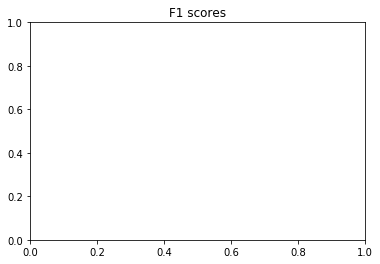

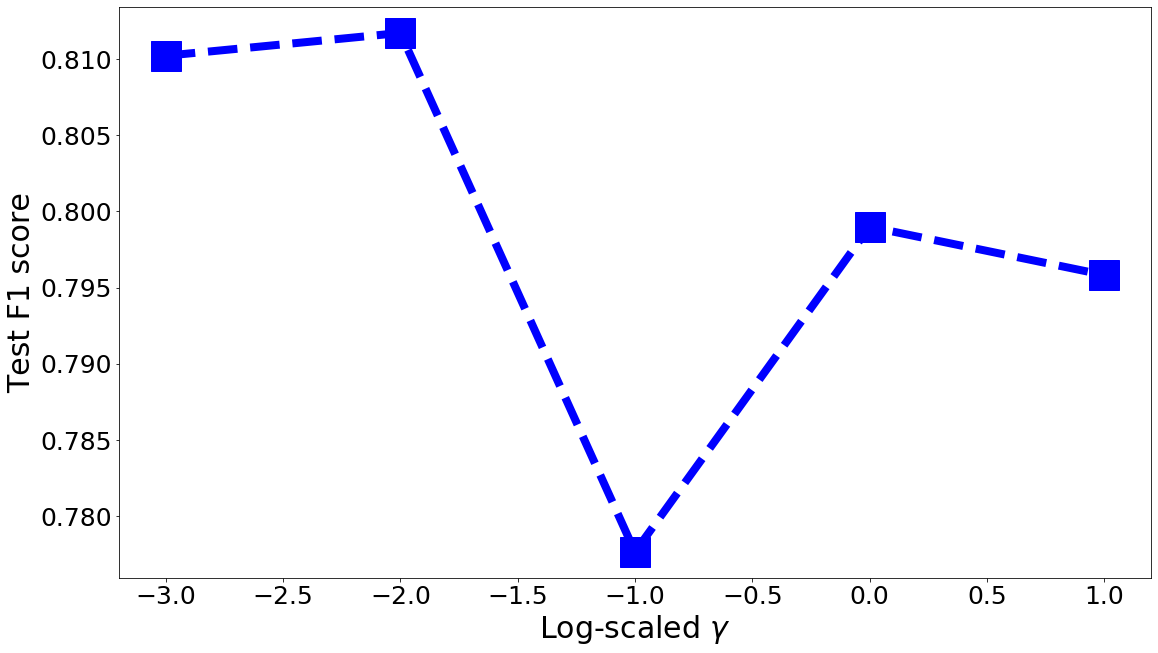

In [ ]:
plt.title("F1 scores")
plt.figure(figsize=(18.5, 10.5))
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel("Log-scaled $\gamma$", fontsize=30)
plt.ylabel("Test F1 score", fontsize=30)
plt.plot(np.log10(gammas),F1s, 'bs--', markersize=30, linewidth=8)

In [ ]:
plt.gcf()set_size_inches(18.5, 10.5)

In [ ]:
3*2*8

In [ ]:
200/48